In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

,temperature
Date,
2020-01-01,29.695926
2020-01-02,29.222472
2020-01-03,29.802057
2020-01-04,30.185305
2020-01-05,29.568169
...,...
2020-07-14,29.970252
2020-07-15,29.865952
2020-07-16,30.241439


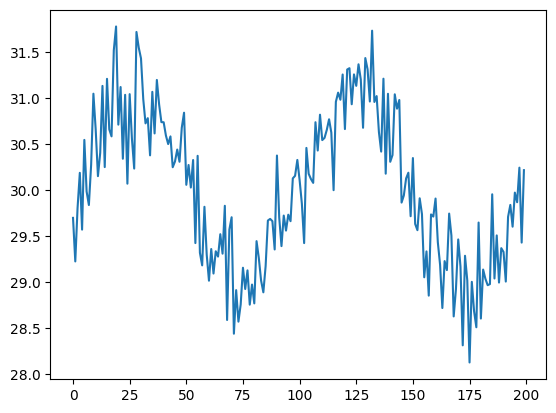

In [2]:
# Generate synthetic data 

np.random.seed(58) #1) generate semi-randomly numbers
date = pd.date_range(start="2020-01-01", periods=200) #2) Set date range

#3) Set the variable, here I decide to choose a synthetic temperature
#   I put it on the sinus with Pi to have a visually better wave function
#   I instaure randome walks 

temperature = 30 + np.sin(np.linspace(0, 4*np.pi, 200)) + np.random.normal(0, 0.4,200)
plt.plot(temperature)

data = pd.DataFrame({ "Date": date, "temperature": temperature }) #4) Transform in DataFrame
data.set_index("Date", inplace=True)
data

In [10]:
#5) no differencing because the mean is 0.05 so :
#   I work with 
working_serie = ARIMA(data["temperature"], order=(2,0,2))  
working_serie_fit = working_serie.fit()
forecast = working_serie_fit.forecast(steps=90)
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=90)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


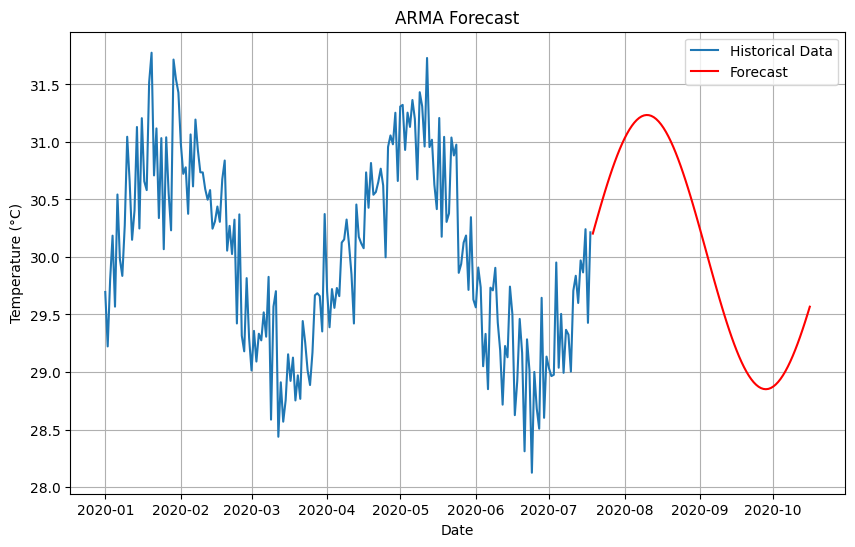

In [11]:
# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["temperature"], label="Historical Data")
plt.plot(future_dates, forecast, label="Forecast", color="red")
plt.title("ARMA Forecast")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()